In [1]:
import seaborn as sns
from alphaanalysis.plot.gam import get_sig_intervals
from matplotlib import pyplot as plt

# Data Base

In [ ]:
%%capture

from djimaging.user.alpha.schemas.alpha_schema import *
from djimaging.user.alpha.utils import database

indicator = 'calcium'
database.connect_dj(indicator=indicator)

# Data

In [3]:
rf_kind = 'roi'

if rf_kind == 'field':
    rf_tab = (database.get_rf_tab(quality_filter=True, roi_kind='field').proj(rf_size='rf_cdia_um', surround_index='full_surround_index') * 
              FieldRoiPosMetrics.proj(soma_dist='d_dist_to_soma') * 
              RetinalFieldLocationWing().proj(group="wing_side"))
    df = rf_tab.fetch(format='frame').reset_index()
else:  
    rf_tab = (database.get_rf_tab(quality_filter=True, roi_kind='roi').proj(rf_size='rf_cdia_um', surround_index='full_surround_index') * 
              FieldPosMetrics.RoiPosMetrics.proj(soma_dist='d_dist_to_soma') * 
              RetinalFieldLocationWing().proj(group="wing_side"))
    df = rf_tab.fetch(format='frame').reset_index()

df

,experimenter,date,exp_num,field,stim_name,raw_id,cond1,roi_id,preprocess_id,dnoise_params_id,rf_glm_params_id,split_rf_params_id,rf_contours_params_id,roi_pos_params_hash,table_hash,rf_size,surround_index,soma_dist,group
0,Ran,2018-06-10,1,D1,noise_2500,1,control,1,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,140.676,-0.121651,140.978,d
1,Ran,2018-06-10,1,D1,noise_2500,1,control,2,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,151.144,-0.193695,112.357,d
2,Ran,2018-06-10,1,D1,noise_2500,1,control,4,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,133.757,-0.083276,137.378,d
3,Ran,2018-06-10,1,D1,noise_2500,1,control,5,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,140.853,-0.104874,124.131,d
4,Ran,2018-06-10,1,D1,noise_2500,1,control,6,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,142.584,-0.069049,120.920,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Ran,2020-08-31,1,d6,noise_1500,1,control,9,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,132.128,-0.085026,103.165,n
686,Ran,2020-08-31,1,d6,noise_1500,1,control,10,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,132.315,-0.054620,138.421,n
687,Ran,2020-08-31,1,d6,noise_1500,1,control,11,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,139.227,-0.061943,106.670,n
688,Ran,2020-08-31,1,d6,noise_1500,1,control,12,1,1,10,1,1,943ab374aa2c45298aafba0732936bcd,67f28a1bf74f1f3a68beb187e0ca8913,132.186,-0.039385,106.390,n


In [4]:
import utils

df = utils.prep_df(df)
df.head()

,experimenter,date,exp_num,field,stim_name,cond1,roi_id,rf_size,surround_index,soma_dist,group,cell_id,field_id
0,Ran,2018-06-10,1,D1,noise_2500,control,1,140.676,-0.121651,140.978,d,2018-06-10_1,2018-06-10_1_D1
1,Ran,2018-06-10,1,D1,noise_2500,control,2,151.144,-0.193695,112.357,d,2018-06-10_1,2018-06-10_1_D1
2,Ran,2018-06-10,1,D1,noise_2500,control,4,133.757,-0.083276,137.378,d,2018-06-10_1,2018-06-10_1_D1
3,Ran,2018-06-10,1,D1,noise_2500,control,5,140.853,-0.104874,124.131,d,2018-06-10_1,2018-06-10_1_D1
4,Ran,2018-06-10,1,D1,noise_2500,control,6,142.584,-0.069049,120.920,d,2018-06-10_1,2018-06-10_1_D1


In [5]:
(df[df.group =='t'].soma_dist).max()

206.137

# Plot

In [6]:
from alphaanalysis import plot as plota
plota.set_rc_params()

In [7]:
order = plota.get_order(indicator=indicator)
palette = plota.get_palette(indicator=indicator)
colors = [palette[group] for group in order]

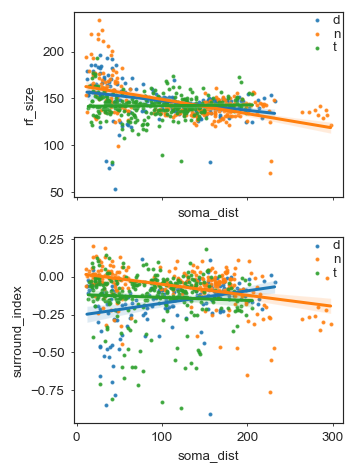

In [8]:
utils.plot_scatter_metrics(df, ['rf_size', 'surround_index'], groupby='group')

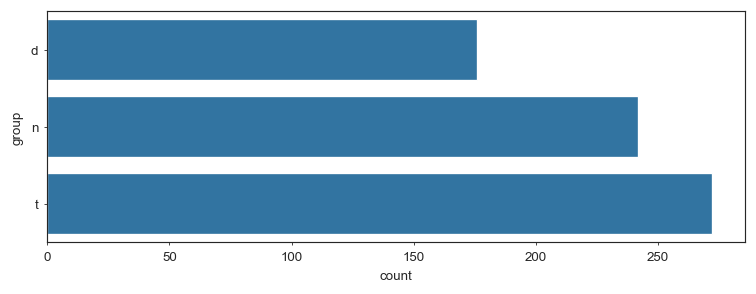

In [9]:
sns.countplot(data=df, y="group");

## Scale surround index to make it more Gaussian

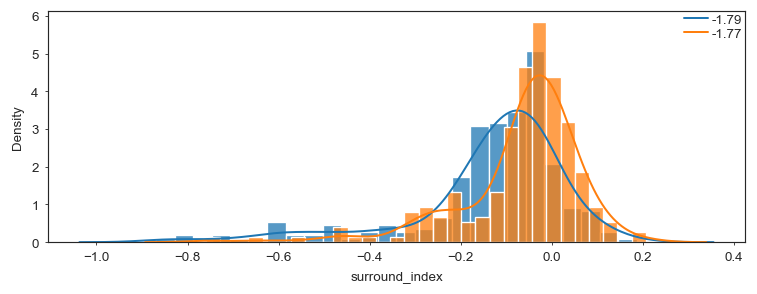

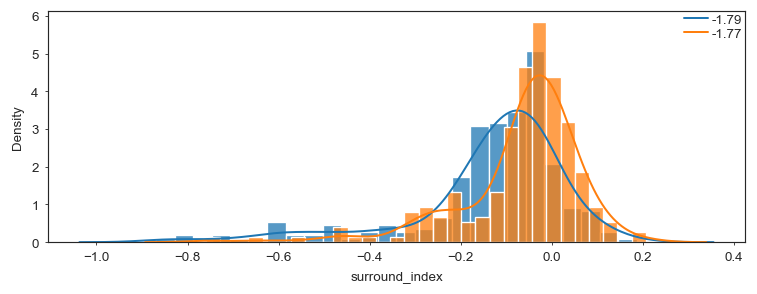

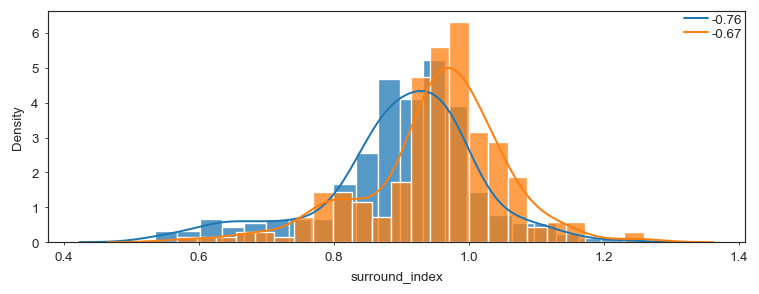

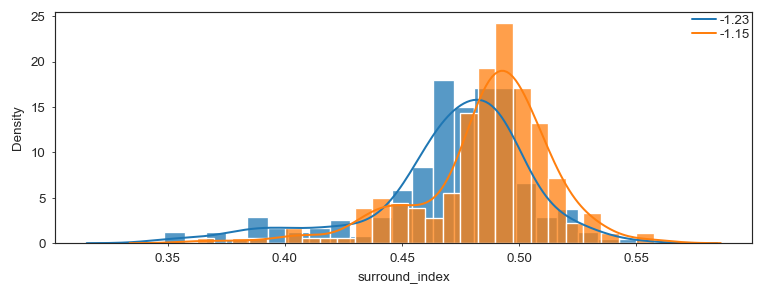

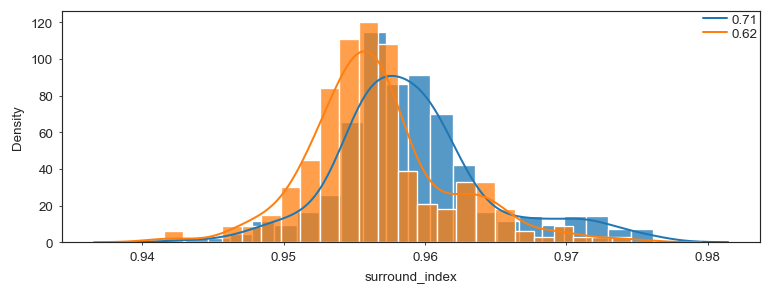

In [10]:
arrs = [df[df.group=='t']['surround_index'], df[df.group=='n']['surround_index']]
utils.plot_skew(*arrs, f_trans=lambda x: x)
utils.plot_skew(*arrs, f_trans=lambda x: x)
utils.plot_skew(*arrs, f_trans=lambda x: 1/(1 - x))
utils.plot_skew(*arrs, f_trans=lambda x: 1/(2 - x))
utils.plot_skew(*arrs, f_trans=lambda x: np.log10(10 - 1/(1 - x)))

In [11]:
f_trans = lambda x: 1. / (1. - x)
f_trans_inv = lambda x: 1. - 1. / x

df['trans_surround_index'] = df['surround_index'].apply(f_trans)

# Fit GAM

In [12]:
%load_ext rpy2.ipython

In [13]:
%%R
#noqa

rm(list=ls()) 

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


## R imports

In [14]:
%%R
#noqa

library("IRdisplay")
library("dplyr")
library('parallel')
library('ggplot2')
library("nlme")
library("mgcv")
library("ggthemes")
library("itsadug")
library("png")
library("xtable")
library("tidymv")
library("cowplot")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.
Loading required package: plotfunctions

Attaching package: ‘plotfunctions’

The following object is masked from ‘package:ggplot2’:

    alpha

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Attaching package: ‘xtable’

The following object is masked from ‘package:IRdisplay’:

    display

tidymv has been superseded by tidygam. The package tidymv is no longer maintained but will be
    kept on CRAN to ensure reproducibility of older analyses. Users should
    use the replacement package tidygam for new analyses, which is available on
    CRAN and GitHu

# Import R df

In [15]:
%%R -i df -o min_rf_size
#noqa

df$group <- factor(df$group)
df$cell_id <- factor(df$cell_id)
df$field_id <- factor(df$field_id)

min_rf_size <- 0

df <- df[df$soma_dist <= 200, ]
df <- df[df$rf_size >= min_rf_size, ]

head(df)

  experimenter   date exp_num field  stim_name   cond1 roi_id rf_size
0          Ran 736855       1    D1 noise_2500 control      1 140.676
1          Ran 736855       1    D1 noise_2500 control      2 151.144
2          Ran 736855       1    D1 noise_2500 control      4 133.757
3          Ran 736855       1    D1 noise_2500 control      5 140.853
4          Ran 736855       1    D1 noise_2500 control      6 142.584
5          Ran 736855       1    D1 noise_2500 control      7 136.740
  surround_index soma_dist group      cell_id        field_id
0     -0.1216510   140.978     d 2018-06-10_1 2018-06-10_1_D1
1     -0.1936950   112.357     d 2018-06-10_1 2018-06-10_1_D1
2     -0.0832763   137.378     d 2018-06-10_1 2018-06-10_1_D1
3     -0.1048740   124.131     d 2018-06-10_1 2018-06-10_1_D1
4     -0.0690491   120.920     d 2018-06-10_1 2018-06-10_1_D1
5     -0.0281440   128.833     d 2018-06-10_1 2018-06-10_1_D1
  trans_surround_index
0            0.8915429
1            0.8377349
2      

## Helper functions

In [16]:
%%R
#noqa

display_model <- function(m){
    print(summary(m));
    tabs <- capture.output(gamtabs(m, type="HTML"));
    display_html(tabs);
}

## Plot raw data

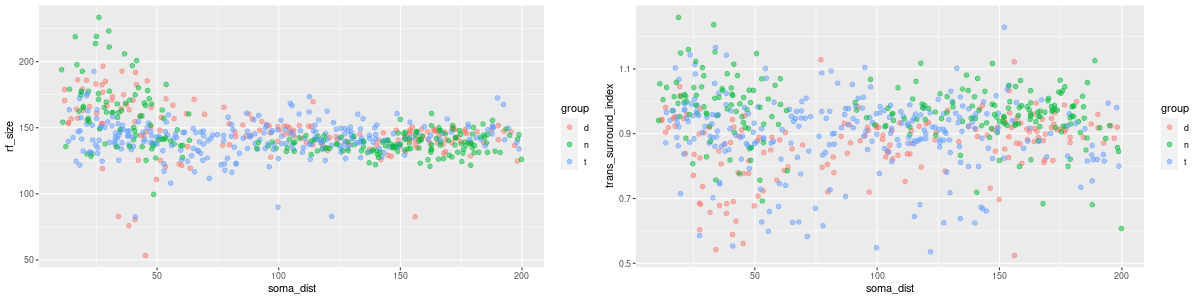

In [17]:
%%R -w 1200 -h 300
#noqa

p1 <- ggplot(aes(x=soma_dist, y=rf_size, color=group), data=df)  +
    geom_point(alpha=.5, size=2)
    
p2 <- ggplot(aes(x=soma_dist, y=trans_surround_index, color=group), data=df)  +
    geom_point(alpha=.5, size=2)
    
plot(plot_grid(p1, p2, ncol=2))

# GAMs

## RF size

In [18]:
%%R
#noqa

m1_size  <- gam(rf_size ~ group + s(soma_dist, k=8, bs="cr"), data=df)
m2_size  <- gam(rf_size ~ group + s(soma_dist, by=group, k=8, bs="cr"), data=df)
m3a_size <- gam(rf_size ~ group + s(soma_dist, by=group, k=8, bs="cr") + s(cell_id, bs="re"), data=df)
m3b_size <- gam(rf_size ~ group + s(soma_dist, by=group, k=8, bs="cr") + s(cell_id, bs="re"), data=df, family='scat')
m4a_size <- gam(rf_size ~ group + s(soma_dist, by=group, k=12, bs="cr") + s(cell_id, bs="re"), data=df)
m4b_size <- gam(rf_size ~ group + s(soma_dist, by=group, k=12, bs="cr") + s(cell_id, bs="re"), data=df, family='scat')
m5a_size <- gam(rf_size ~ group + s(soma_dist, by=group, k=16, bs="cr") + s(cell_id, bs="re"), data=df)
m5b_size <- gam(rf_size ~ group + s(soma_dist, by=group, k=16, bs="cr") + s(cell_id, bs="re"), data=df, family='scat')

In [19]:
%%R
#noqa

BIC(m1_size, m2_size, m3a_size, m3b_size, m4a_size, m4b_size, m5a_size, m5b_size)

                df      BIC
m1_size   9.589537 5523.306
m2_size  18.428312 5508.744
m3a_size 30.685548 5462.563
m3b_size 29.527586 5305.783
m4a_size 31.416001 5467.237
m4b_size 30.482671 5309.587
m5a_size 31.439079 5467.619
m5b_size 30.701725 5310.581


In [20]:
%%R
#noqa

anova(m1_size, m2_size, m3a_size, m4a_size, m5a_size, test="F")

Analysis of Deviance Table

Model 1: rf_size ~ group + s(soma_dist, k = 8, bs = "cr")
Model 2: rf_size ~ group + s(soma_dist, by = group, k = 8, bs = "cr")
Model 3: rf_size ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + 
    s(cell_id, bs = "re")
Model 4: rf_size ~ group + s(soma_dist, by = group, k = 12, bs = "cr") + 
    s(cell_id, bs = "re")
Model 5: rf_size ~ group + s(soma_dist, by = group, k = 16, bs = "cr") + 
    s(cell_id, bs = "re")
  Resid. Df Resid. Dev       Df Deviance       F    Pr(>F)    
1    642.62     165742                                        
2    632.21     148451 10.41242  17291.7  8.4283 2.443e-13 ***
3    619.20     122437 13.00370  26013.0 10.1526 < 2.2e-16 ***
4    617.36     122426  1.84231     11.1  0.0305    0.9621    
5    617.09     122470  0.26842    -43.6                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
%%R
#noqa

anova(m3b_size, m4b_size, m5b_size, test="F")

Analysis of Deviance Table

Model 1: rf_size ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + 
    s(cell_id, bs = "re")
Model 2: rf_size ~ group + s(soma_dist, by = group, k = 12, bs = "cr") + 
    s(cell_id, bs = "re")
Model 3: rf_size ~ group + s(soma_dist, by = group, k = 16, bs = "cr") + 
    s(cell_id, bs = "re")
  Resid. Df Resid. Dev      Df Deviance Pr(>Chi)
1    620.18     5114.4                          
2    618.87     5112.1 1.30575  2.38555   0.1737
3    618.55     5111.6 0.32035  0.42465   0.1841



Family: Scaled t(3,8.457) 
Link function: identity 

Formula:
rf_size ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + 
    s(cell_id, bs = "re")

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  149.702      2.061  72.623  < 2e-16 ***
groupn        -4.534      2.789  -1.626  0.10394    
groupt        -7.692      2.736  -2.811  0.00494 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                       edf Ref.df Chi.sq p-value    
s(soma_dist):groupd  2.873  3.569 124.98  <2e-16 ***
s(soma_dist):groupn  4.399  5.241 248.26  <2e-16 ***
s(soma_dist):groupt  2.986  3.664  12.72  0.0133 *  
s(cell_id)          11.196 14.000  58.37  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.287   Deviance explained = 24.2%
-REML = 2578.6  Scale est. = 1         n = 652

Method: REML   Optimizer: outer newton
full convergence after 11 iter

In addition: Warning message:
In getOption("jupyter.base_display_func")(data, metadata) :
  IRdisplay can only be used from the IPython R kernel and R magic.


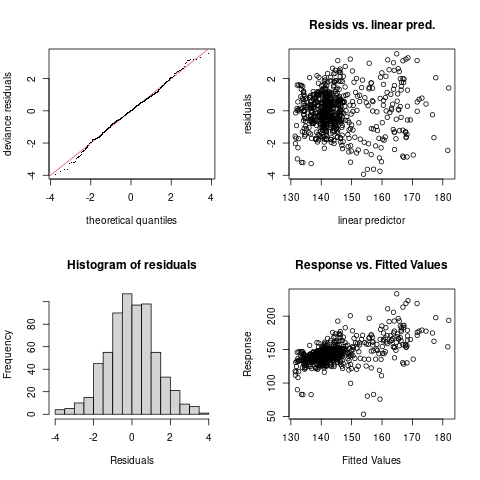

In [22]:
%%R
#noqa

m_rf_size <- m3b_size
display_model(m_rf_size)
gam.check(m_rf_size)

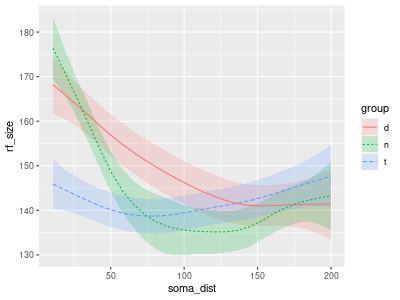

In [23]:
%%R -w 400 -h 300
#noqa

p1 <- plot_smooths(model=m_rf_size, series=soma_dist, comparison=group)
plot(p1, ylim=c(0, 60))

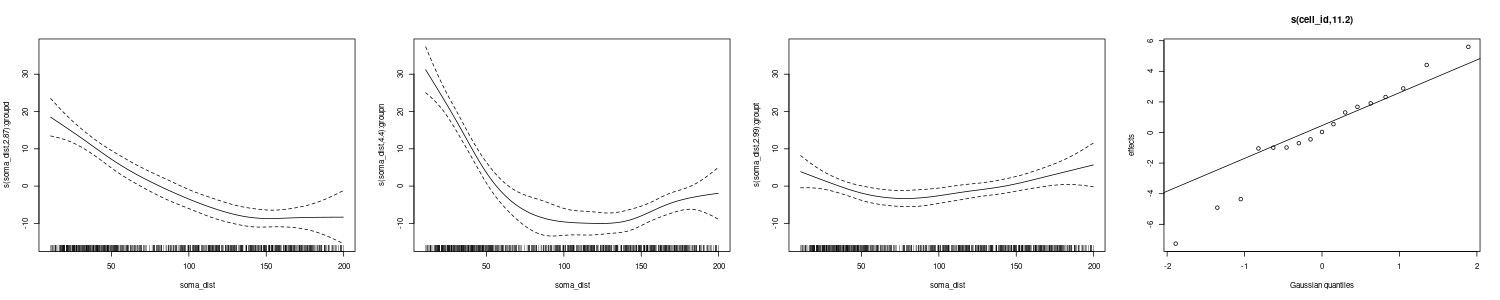

In [24]:
%%R -w 1500 -h 300
#noqa

par(mfrow = c(1,4))
plot(m_rf_size)

### Plot fits

In [25]:
%%R
#noqa

r_df_pred_size = predict_gam(m_rf_size, exclude_terms=s(cell_id, bs="re"))
head(r_df_pred_size)

# A tibble: 6 × 5
  group soma_dist cell_id        fit se.fit
  <fct>     <dbl> <fct>        <dbl>  <dbl>
1 d          10.7 2018-06-10_1  168.   3.28
2 n          10.7 2018-06-10_1  176.   3.54
3 t          10.7 2018-06-10_1  146.   2.83
4 d          14.6 2018-06-10_1  167.   3.02
5 n          14.6 2018-06-10_1  174.   3.03
6 t          14.6 2018-06-10_1  145.   2.59


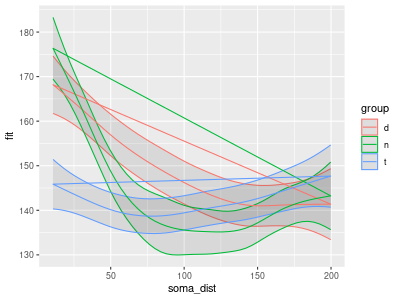

In [26]:
%%R -w 400 -h 300
#noqa

predict_gam(m_rf_size, exclude_terms=s(cell_id, bs="re")) %>%
    ggplot(aes(soma_dist, fit, col=group)) +
    geom_smooth_ci()

### Plot differences 

[1] 2.39398
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 10.734400 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

soma_dist window(s) of significant difference(s):
	50.837739 - 115.766956
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 10.734400 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

soma_dist window(s) of significant difference(s):
	10.734400 - 50.837739
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 10.734400 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

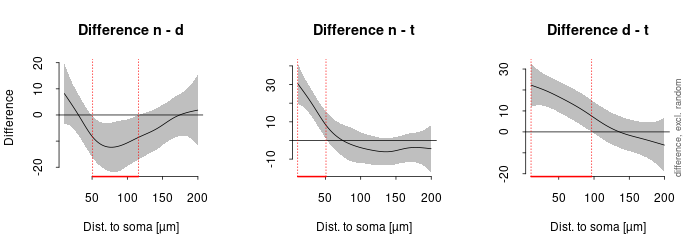

In [27]:
%%R -w 700 -h 250 -o nd_diff_size -o nt_diff_size -o dt_diff_size
#noqa

n_diffs <- 3
par(mfrow=c(1, n_diffs), cex=1.0, tcl=-0.2)

se <- qnorm((100 - (2.5/n_diffs))/100)
print(se)
ylim <- NULL #c(-150, 150)
ylab <- 'Difference'
xlab <- 'Dist. to soma [µm]'

nd_diff_size <- plot_diff(m_rf_size, view="soma_dist", comp=list(group=c("n", "d")), se=se, ylab=ylab, xlab=xlab, ylim=ylim, hide.label=TRUE)
nt_diff_size <- plot_diff(m_rf_size, view="soma_dist", comp=list(group=c("n", "t")), se=se, ylab='', xlab=xlab, ylim=ylim, hide.label=TRUE)
dt_diff_size <- plot_diff(m_rf_size, view="soma_dist", comp=list(group=c("d", "t")), se=se, ylab='', xlab=xlab, ylim=ylim)

In [28]:
pairs_sig_regions_size = [
    ("n vs. d", get_sig_intervals(nd_diff_size)),
    ("n vs. t", get_sig_intervals(nt_diff_size)),
    ("d vs. t", get_sig_intervals(dt_diff_size)),
]
pairs_sig_regions_size

[]
[20 55]
[ 0 21]
[]
[ 0 45]
[]


[('n vs. d', [(48.92805656565657, 115.76695555555557)]),
 ('n vs. t', [(10.7344, 50.8377393939394)]),
 ('d vs. t', [(10.7344, 96.67012727272729)])]

## Surround index

In [29]:
%%R
#noqa

m1_surr <- gam(trans_surround_index ~ group + s(soma_dist, k=8, bs="cr"), data=df)
m2_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=8, bs="cr"), data=df)
m3a_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=8, bs="cr")+ s(cell_id, bs="re"), data=df)
m3b_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=8, bs="cr")+ s(cell_id, bs="re"), data=df, family='scat')
m4a_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=12, bs="cr")+ s(cell_id, bs="re"), data=df)
m4b_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=12, bs="cr")+ s(cell_id, bs="re"), data=df, family='scat')
m5a_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=16, bs="cr")+ s(cell_id, bs="re"), data=df)
m5b_surr <- gam(trans_surround_index ~ group + s(soma_dist, by=group, k=16, bs="cr")+ s(cell_id, bs="re"), data=df, family='scat')

In [30]:
%%R
#noqa

BIC(m1_surr, m2_surr, m3a_surr, m3b_surr, m4a_surr, m4b_surr, m5a_surr, m5b_surr)

                df       BIC
m1_surr   9.562349 -1082.428
m2_surr  19.390895 -1060.984
m3a_surr 28.743664 -1396.844
m3b_surr 29.609503 -1448.902
m4a_surr 30.070753 -1392.063
m4b_surr 30.656513 -1444.463
m5a_surr 29.994996 -1391.994
m5b_surr 30.952418 -1442.671


In [31]:
%%R
#noqa

anova(m1_surr, m2_surr, m3a_surr, m4a_surr, m5a_surr, test="F")

Analysis of Deviance Table

Model 1: trans_surround_index ~ group + s(soma_dist, k = 8, bs = "cr")
Model 2: trans_surround_index ~ group + s(soma_dist, by = group, k = 8, 
    bs = "cr")
Model 3: trans_surround_index ~ group + s(soma_dist, by = group, k = 8, 
    bs = "cr") + s(cell_id, bs = "re")
Model 4: trans_surround_index ~ group + s(soma_dist, by = group, k = 12, 
    bs = "cr") + s(cell_id, bs = "re")
Model 5: trans_surround_index ~ group + s(soma_dist, by = group, k = 16, 
    bs = "cr") + s(cell_id, bs = "re")
  Resid. Df Resid. Dev       Df Deviance       F    Pr(>F)    
1    642.64     6.5993                                        
2    631.50     6.1853 11.14133  0.41403  6.9101 3.616e-11 ***
3    621.86     3.3672  9.63501  2.81804 54.3853 < 2.2e-16 ***
4    619.83     3.3476  2.03136  0.01966  1.7999    0.1656    
5    619.68     3.3505  0.14909 -0.00288                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [32]:
%%R
#noqa

anova(m3b_surr, m4b_surr, m5b_surr, test="F")

Analysis of Deviance Table

Model 1: trans_surround_index ~ group + s(soma_dist, by = group, k = 8, 
    bs = "cr") + s(cell_id, bs = "re")
Model 2: trans_surround_index ~ group + s(soma_dist, by = group, k = 12, 
    bs = "cr") + s(cell_id, bs = "re")
Model 3: trans_surround_index ~ group + s(soma_dist, by = group, k = 16, 
    bs = "cr") + s(cell_id, bs = "re")
  Resid. Df Resid. Dev      Df Deviance Pr(>Chi)
1    622.48    -1640.8                          
2    621.02    -1643.1 1.45174  2.34520   0.2044
3    620.58    -1643.2 0.44415  0.12611   0.4135



Family: Scaled t(3.893,0.054) 
Link function: identity 

Formula:
trans_surround_index ~ group + s(soma_dist, by = group, k = 8, 
    bs = "cr") + s(cell_id, bs = "re")

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.83573    0.04092  20.424   <2e-16 ***
groupn       0.10716    0.05535   1.936   0.0528 .  
groupt       0.02885    0.05526   0.522   0.6016    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                       edf Ref.df Chi.sq  p-value    
s(soma_dist):groupd  5.071  5.943  46.24  < 2e-16 ***
s(soma_dist):groupn  1.135  1.258  11.66 0.001987 ** 
s(soma_dist):groupt  2.770  3.419  21.58 0.000161 ***
s(cell_id)          13.718 14.000 714.95  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.547   Deviance explained = 43.4%
-REML = -751.08  Scale est. = 1         n = 652

Method: REML   Optimizer: outer newton
full co

In addition: Warning message:
In getOption("jupyter.base_display_func")(data, metadata) :
  IRdisplay can only be used from the IPython R kernel and R magic.


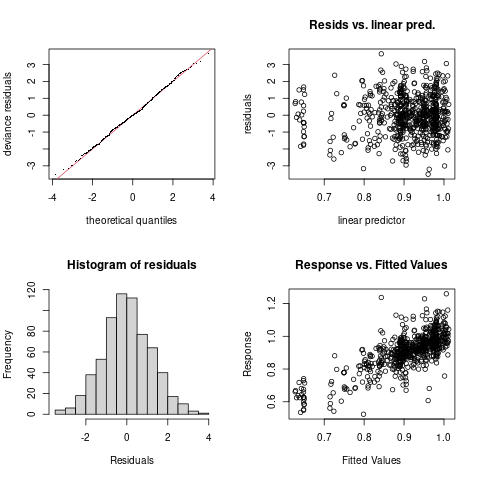

In [33]:
%%R
m_surround <- m3b_surr
display_model(m_surround)
gam.check(m_surround)

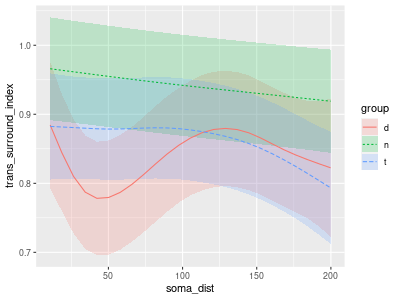

In [34]:
%%R -w 400 -h 300
#noqa

p1 <- plot_smooths(model=m_surround, series=soma_dist, comparison=group)
plot(p1, ylim=c(0, 60))

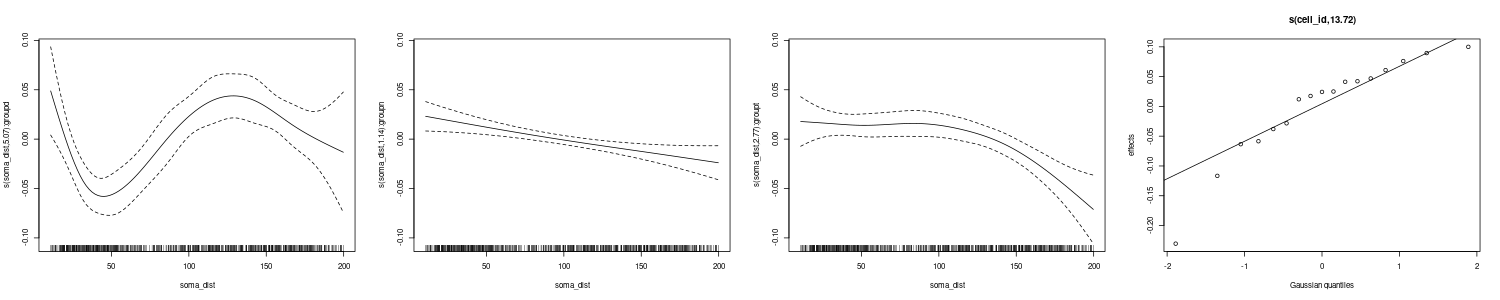

In [35]:
%%R -w 1500 -h 300
#noqa

par(mfrow = c(1,4))
plot(m_surround)

### Plot fits

In [36]:
%%R
#noqa

r_df_pred_surround = predict_gam(m_surround, exclude_terms=s(cell_id, bs="re"))
head(r_df_pred_surround)

# A tibble: 6 × 5
  group soma_dist cell_id        fit se.fit
  <fct>     <dbl> <fct>        <dbl>  <dbl>
1 d          10.7 2018-06-10_1 0.885 0.0468
2 n          10.7 2018-06-10_1 0.966 0.0380
3 t          10.7 2018-06-10_1 0.882 0.0393
4 d          14.6 2018-06-10_1 0.864 0.0447
5 n          14.6 2018-06-10_1 0.965 0.0379
6 t          14.6 2018-06-10_1 0.882 0.0387


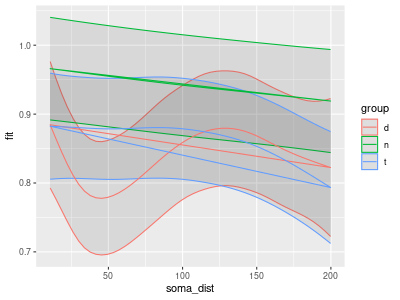

In [37]:
%%R -w 400 -h 300
#noqa

predict_gam(m_surround, exclude_terms=s(cell_id, bs="re")) %>%
    ggplot(aes(soma_dist, fit, col=group)) +
    geom_smooth_ci()

### Plot differences 

[1] 0.9916667
[1] 2.39398
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 10.734400 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

soma_dist window(s) of significant difference(s):
	24.102180 - 73.753933
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 10.734400 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

Difference is not significant.
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 10.734400 to 199.793000. 
	* cell_id : factor; set to the value(s): 2020-05-10_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

Difference is not significa

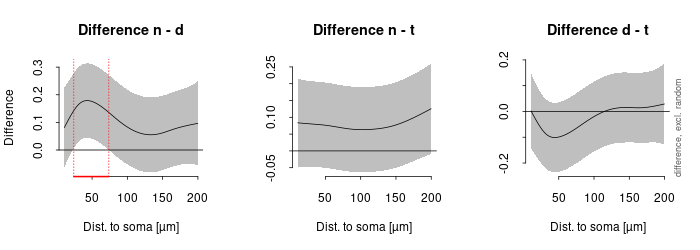

In [38]:
%%R -w 700 -h 250 -o nd_diff_surr -o nt_diff_surr -o dt_diff_surr
#noqa

n_diffs <- 3
par(mfrow=c(1, n_diffs), cex=1.0, tcl=-0.2)

se <- qnorm((100 - (2.5/n_diffs))/100)
print((100 - (2.5/n_diffs))/100)
print(se)
ylim <- NULL#c(-150, 150)
ylab <- 'Difference'
xlab <- 'Dist. to soma [µm]'

nd_diff_surr <- plot_diff(m_surround, view="soma_dist", comp=list(group=c("n", "d")), se=se, ylab=ylab, xlab=xlab, ylim=ylim, hide.label=TRUE)
nt_diff_surr <- plot_diff(m_surround, view="soma_dist", comp=list(group=c("n", "t")), se=se, ylab='', xlab=xlab, ylim=ylim, hide.label=TRUE)
dt_diff_surr <- plot_diff(m_surround, view="soma_dist", comp=list(group=c("d", "t")), se=se, ylab='', xlab=xlab, ylim=ylim)

In [39]:
pairs_sig_regions_surround = [
    ("n vs. d", get_sig_intervals(nd_diff_surr)),
    ("n vs. t", get_sig_intervals(nt_diff_surr)),
    ("d vs. t", get_sig_intervals(dt_diff_surr)),
]
pairs_sig_regions_surround

[ 6 33]
[]
[]
[]
[]
[]


[('n vs. d', [(22.192496969696972, 73.75393333333334)]),
 ('n vs. t', []),
 ('d vs. t', [])]

# Go back to python for easy plotting

In [40]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

with localconverter(ro.default_converter + pandas2ri.converter):
    df_pred_size = ro.conversion.rpy2py(ro.globalenv['r_df_pred_size'])
    df_pred_surround = ro.conversion.rpy2py(ro.globalenv['r_df_pred_surround'])

In [41]:
df_pred_size.head()

,group,soma_dist,cell_id,fit,se.fit
1,d,10.734400,2018-06-10_1,168.173233,3.284257
2,n,10.734400,2018-06-10_1,176.355733,3.539835
3,t,10.734400,2018-06-10_1,145.863407,2.832284
4,d,14.592739,2018-06-10_1,167.107928,3.015186
5,n,14.592739,2018-06-10_1,173.756324,3.031081


In [42]:
df_pred_surround.head()

,group,soma_dist,cell_id,fit,se.fit
1,d,10.734400,2018-06-10_1,0.884514,0.046845
2,n,10.734400,2018-06-10_1,0.965996,0.037987
3,t,10.734400,2018-06-10_1,0.882428,0.039269
4,d,14.592739,2018-06-10_1,0.864477,0.044668
5,n,14.592739,2018-06-10_1,0.964905,0.037906


(2.7, 1.9)


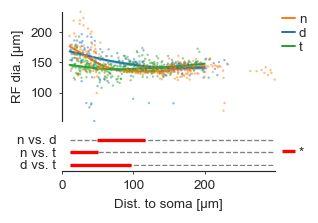

In [43]:
fig, axs = utils.plot_fits(
    df=df,
    df_preds=[df_pred_size],
    pairs_sig_regions_list=[pairs_sig_regions_size],
    titles=[None],
    ys=['rf_size'],
    ylabels=['RF dia. [µm]'],
    x='soma_dist',
    xlabel='Dist. to soma [µm]',
    order=order, colors=colors,
    figsize=(2.7, 1.9), ms=2, ma=0.5
)

sns.scatterplot(ax=axs[0], data=df[df.rf_size < min_rf_size[0]], x='soma_dist', y='rf_size', s=12, marker='o', fc='none', edgecolor='gray', clip_on=False, label='outlier', zorder=-100)

plt.savefig(f'figures/{indicator}_soma_dist_rf_size.pdf')
plt.show()

In [44]:
f_se = 1

df_pred_surround_inv = df_pred_surround.copy()
df_pred_surround_inv['fit'] = df_pred_surround.apply(lambda r: f_trans_inv(r['fit']), axis=1)
df_pred_surround_inv['lb.fit'] = df_pred_surround.apply(lambda r: f_trans_inv(r['fit'] - f_se * r['se.fit']), axis=1)
df_pred_surround_inv['ub.fit'] = df_pred_surround.apply(lambda r: f_trans_inv(r['fit'] + f_se * r['se.fit']), axis=1)

(2.5, 2.0)


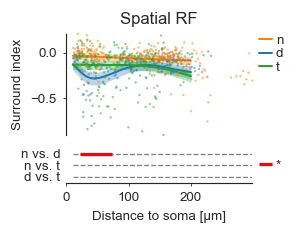

In [45]:
fig, axs = utils.plot_fits(
    df=df,
    df_preds=[df_pred_surround_inv],
    pairs_sig_regions_list=[pairs_sig_regions_surround],
    titles=[None],
    ys=['surround_index'],
    ylabels=['Surround index'],
    x='soma_dist',
    xlabel='Distance to soma [µm]',
    order=order, colors=colors,
    figsize=(2.5, 2.0), ms=2, ma=0.5
)

axs[0].set_title("Spatial RF")
plt.tight_layout()
plt.savefig(f'figures/{indicator}_soma_dist_surround.pdf')
plt.show()